In [1]:
import pandas as pd
import networkx as nx
import numpy as np

In [2]:
df=pd.read_csv('us_edgelist.csv')

In [3]:
df

,From,To,Weight
0,14,7,2
1,8,6,3
2,1,2,5
3,13,5,20
4,14,12,33
5,14,17,2
6,8,0,3
7,8,3,6
8,1,10,4
9,1,18,56


In [4]:
edgelist=list(zip(df['From'],df['To'],{'weight':df['Weight']}))
edgelist

[(14, 7, 'weight')]

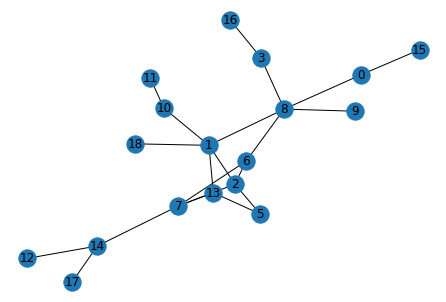

In [49]:
G=nx.from_pandas_edgelist(df, source='From', target='To', edge_attr='Weight')
nx.draw(G, with_labels=True)

In [50]:
nodes=pd.read_csv('nodes.csv')
nodes

,id,Name
0,0,Al Gore
1,1,Obama
2,2,Michelle
3,3,Kerry
4,4,Ivanka
5,5,Melania
6,6,Laura
7,7,Hillary
8,8,Bush
9,9,Bill


In [51]:
nodes.columns

Index(['id', 'Name'], dtype='object')

In [52]:
nx.set_node_attributes(G, pd.Series(nodes.Name, index=nodes.id).to_dict(), 'Name')

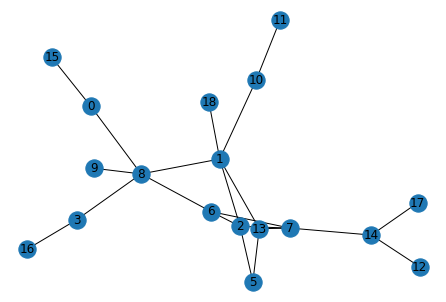

In [53]:
nx.draw(G, with_labels= True, data=True)

In [54]:
nx.get_node_attributes(G,'Name')

{14: 'Clinton',
 7: 'Hillary',
 8: 'Bush',
 6: 'Laura',
 1: 'Obama',
 2: 'Michelle',
 13: 'Trump',
 5: 'Melania ',
 12: ' G.Bush ',
 17: 'Dole',
 0: 'Al Gore',
 3: 'Kerry',
 10: 'McCain',
 18: 'Romney',
 9: 'Bill',
 16: 'J. Thorn',
 15: 'T.Aitcheson',
 11: '\tCindy'}

In [55]:
nx.get_edge_attributes(G,'weight')

{}

# BFS TRAVERSAL

In [56]:
root=1
edges = nx.bfs_edges(G, root)
bfs = [root] + [v for u, v in edges]

In [57]:
bfs

[1, 2, 10, 18, 8, 13, 6, 5, 7, 11, 0, 3, 9, 14, 15, 16, 12, 17]

# DFS TRAVERSAL

In [58]:
root=1
edges = nx.dfs_edges(G, root)
dfs = [root] + [v for u, v in edges]

In [59]:
dfs

[1, 2, 6, 8, 0, 15, 3, 16, 9, 7, 14, 12, 17, 13, 5, 10, 11, 18]

# A* ALGORITHM FOR SHORTEST PATH

Syntax: astar_path(G, source, target, heuristic=None, weight='weight')

Return a list of nodes in a shortest path between source and target using the A* (“A-star”) algorithm.

In [60]:
print(nx.astar_path(G, 1, 7))

[1, 2, 7]


# ALL SHORTEST PATHS BETWEEN SOURCE AND TARGET

all_shortest_paths(G, source, target, weight=None)


Compute all shortest paths in the graph.

In [61]:
print([p for p in nx.all_shortest_paths(G, source=1, target=6)])

[[1, 2, 6], [1, 8, 6]]


# SHORTEST PATH BY DJIKSTRA

shortest_path(G, source=None, target=None, weight=None)


Compute shortest paths in the graph.

In [62]:
print(nx.shortest_path(G, source=1, method='dijkstra', target=7))

[1, 13, 7]


# MINIMUM SPANNING TREE

minimum_spanning_tree(G, weight='weight')


Return a minimum spanning tree or forest of an undirected weighted graph.

A minimum spanning tree is a subgraph of the graph (a tree) with the minimum sum of edge weights.
If the graph is not connected a spanning forest is constructed. A spanning forest is a union of the spanning trees for each connected component of the graph.

In [63]:
T=nx.minimum_spanning_tree(G)
print(sorted(T.edges(data=True)))

[(0, 15, {'Weight': 44}), (1, 10, {'Weight': 4}), (1, 18, {'Weight': 56}), (2, 5, {'Weight': 2}), (3, 16, {'Weight': 23}), (7, 2, {'Weight': 1}), (7, 6, {'Weight': 29}), (7, 13, {'Weight': 4}), (8, 0, {'Weight': 3}), (8, 1, {'Weight': 2}), (8, 3, {'Weight': 6}), (8, 6, {'Weight': 3}), (8, 9, {'Weight': 3}), (10, 11, {'Weight': 3}), (14, 7, {'Weight': 2}), (14, 12, {'Weight': 33}), (14, 17, {'Weight': 2})]


# ALL SHORTEST PATHS STARTING FROM SOURCE

single_source_shortest_path(G, source, cutoff=None)

Compute shortest path between source and all other nodes reachable from source.

In [64]:
path = nx.single_source_shortest_path(G, 1)

In [65]:
path

{1: [1],
 2: [1, 2],
 10: [1, 10],
 18: [1, 18],
 8: [1, 8],
 13: [1, 13],
 6: [1, 2, 6],
 5: [1, 2, 5],
 7: [1, 2, 7],
 11: [1, 10, 11],
 0: [1, 8, 0],
 3: [1, 8, 3],
 9: [1, 8, 9],
 14: [1, 2, 7, 14],
 15: [1, 8, 0, 15],
 16: [1, 8, 3, 16],
 12: [1, 2, 7, 14, 12],
 17: [1, 2, 7, 14, 17]}

In [66]:
path = nx.all_pairs_shortest_path(G)

In [67]:
print(list(path))

[(14, {14: [14], 7: [14, 7], 12: [14, 12], 17: [14, 17], 13: [14, 7, 13], 6: [14, 7, 6], 2: [14, 7, 2], 5: [14, 7, 13, 5], 1: [14, 7, 13, 1], 8: [14, 7, 6, 8], 10: [14, 7, 13, 1, 10], 18: [14, 7, 13, 1, 18], 0: [14, 7, 6, 8, 0], 3: [14, 7, 6, 8, 3], 9: [14, 7, 6, 8, 9], 11: [14, 7, 13, 1, 10, 11], 15: [14, 7, 6, 8, 0, 15], 16: [14, 7, 6, 8, 3, 16]}), (7, {7: [7], 14: [7, 14], 13: [7, 13], 6: [7, 6], 2: [7, 2], 12: [7, 14, 12], 17: [7, 14, 17], 5: [7, 13, 5], 1: [7, 13, 1], 8: [7, 6, 8], 10: [7, 13, 1, 10], 18: [7, 13, 1, 18], 0: [7, 6, 8, 0], 3: [7, 6, 8, 3], 9: [7, 6, 8, 9], 11: [7, 13, 1, 10, 11], 15: [7, 6, 8, 0, 15], 16: [7, 6, 8, 3, 16]}), (8, {8: [8], 6: [8, 6], 0: [8, 0], 3: [8, 3], 9: [8, 9], 1: [8, 1], 7: [8, 6, 7], 2: [8, 6, 2], 15: [8, 0, 15], 16: [8, 3, 16], 10: [8, 1, 10], 18: [8, 1, 18], 13: [8, 1, 13], 14: [8, 6, 7, 14], 5: [8, 6, 2, 5], 11: [8, 1, 10, 11], 12: [8, 6, 7, 14, 12], 17: [8, 6, 7, 14, 17]}), (6, {6: [6], 8: [6, 8], 7: [6, 7], 2: [6, 2], 0: [6, 8, 0], 3: [6, 

In [68]:
path1=nx.floyd_warshall(G)

In [69]:
path1

{14: defaultdict(<function networkx.algorithms.shortest_paths.dense.floyd_warshall_predecessor_and_distance.<locals>.<lambda>.<locals>.<lambda>()>,
             {14: 0,
              7: 1.0,
              12: 1.0,
              17: 1.0,
              8: 3.0,
              6: 2.0,
              1: 3.0,
              2: 2.0,
              13: 2.0,
              5: 3.0,
              0: 4.0,
              3: 4.0,
              10: 4.0,
              18: 4.0,
              9: 4.0,
              16: 5.0,
              15: 5.0,
              11: 5.0}),
 7: defaultdict(<function networkx.algorithms.shortest_paths.dense.floyd_warshall_predecessor_and_distance.<locals>.<lambda>.<locals>.<lambda>()>,
             {7: 0,
              14: 1.0,
              13: 1.0,
              6: 1.0,
              2: 1.0,
              8: 2.0,
              1: 2.0,
              5: 2.0,
              12: 2.0,
              17: 2.0,
              0: 3.0,
              3: 3.0,
              10: 3.0,
           

In [70]:
length = nx.all_pairs_shortest_path_length(G)
length

<generator object all_pairs_shortest_path_length at 0x0000022F9D1D8970>

In [71]:
print(list(length))

[(14, {14: 0, 7: 1, 12: 1, 17: 1, 13: 2, 6: 2, 2: 2, 5: 3, 1: 3, 8: 3, 10: 4, 18: 4, 0: 4, 3: 4, 9: 4, 11: 5, 15: 5, 16: 5}), (7, {7: 0, 14: 1, 13: 1, 6: 1, 2: 1, 12: 2, 17: 2, 5: 2, 1: 2, 8: 2, 10: 3, 18: 3, 0: 3, 3: 3, 9: 3, 11: 4, 15: 4, 16: 4}), (8, {8: 0, 6: 1, 0: 1, 3: 1, 9: 1, 1: 1, 7: 2, 2: 2, 15: 2, 16: 2, 10: 2, 18: 2, 13: 2, 14: 3, 5: 3, 11: 3, 12: 4, 17: 4}), (6, {6: 0, 8: 1, 7: 1, 2: 1, 0: 2, 3: 2, 9: 2, 1: 2, 14: 2, 13: 2, 5: 2, 15: 3, 16: 3, 10: 3, 18: 3, 12: 3, 17: 3, 11: 4}), (1, {1: 0, 2: 1, 10: 1, 18: 1, 8: 1, 13: 1, 6: 2, 5: 2, 7: 2, 11: 2, 0: 2, 3: 2, 9: 2, 14: 3, 15: 3, 16: 3, 12: 4, 17: 4}), (2, {2: 0, 1: 1, 6: 1, 5: 1, 7: 1, 10: 2, 18: 2, 8: 2, 13: 2, 14: 2, 11: 3, 0: 3, 3: 3, 9: 3, 12: 3, 17: 3, 15: 4, 16: 4}), (13, {13: 0, 5: 1, 7: 1, 1: 1, 2: 2, 14: 2, 6: 2, 10: 2, 18: 2, 8: 2, 12: 3, 17: 3, 11: 3, 0: 3, 3: 3, 9: 3, 15: 4, 16: 4}), (5, {5: 0, 13: 1, 2: 1, 7: 2, 1: 2, 6: 2, 14: 3, 10: 3, 18: 3, 8: 3, 12: 4, 17: 4, 11: 4, 0: 4, 3: 4, 9: 4, 15: 5, 16: 5}), (12, 

In [72]:
nx.bellman_ford_path_length(G, 1, 13, weight=df['Weight'])

TypeError: 'Series' objects are mutable, thus they cannot be hashed

# Random Walk


In [80]:
import random
import operator

random_node = 1
path=[]
path.append(random_node)

for i in range(4):
    list_for_nodes = list(G.neighbors(random_node))
    if len(list_for_nodes)==0:# if random_node having no outgoing edges
        random_node = random.choice([i for i in range(G.number_of_nodes())])
        path.append(random_node)
        
    else:
        random_node = random.choice(list_for_nodes) #choose a node randomly from neighbors
        path.append(random_node)
        
print(path)

[1, 2, 6, 8, 3]


In [82]:
import random
import operator
 
start_node = 1 
path=[]
path.append(start_node)
steps=4
random_node=start_node
for i in range(steps): 
    list_for_nodes = list(G.neighbors(random_node))
    if len(list_for_nodes)==0:# if random_node having no outgoing edges
        random_node = random.choice([i for i in range(G.number_of_nodes())])
        path.append(random_node)
        
    else:
        random_node = random.choice(list_for_nodes) #choose a node randomly from neighbors
        path.append(random_node)
        
print(path)


[1, 10, 11, 10, 11]


# SIMRANK SIMILARITY

In [32]:
from numpy import array
sim = nx.simrank_similarity(G)
lol = [[sim[u][v] for v in sorted(sim[u])] for u in sorted(sim)]
sim_array = array(lol)

In [33]:
print(sim_array)

[[1.         0.40203304 0.14727701 0.59744707 0.29774095 0.4035503
  0.22740125 0.10360185 0.70146404 0.10040568 0.33371323 0.16953665
  0.14817385 0.164442   0.08476507 0.08476507 0.16953665 0.11049206]
 [0.40203304 1.         0.17149094 0.40203304 0.51985963 0.39623491
  0.37975908 0.13574696 0.47479384 0.1157621  0.54194787 0.26962091
  0.15875587 0.16257309 0.10979104 0.10979104 0.26962091 0.12770246]
 [0.14727701 0.17149094 1.         0.14727701 0.20071209 0.28890025
  0.26701296 0.38888941 0.16394098 0.43369655 0.13853837 0.18768582
  0.51879619 0.36054894 0.29941323 0.29941323 0.18768582 0.51656705]
 [0.59744707 0.40203304 0.14727701 1.         0.29774095 0.4035503
  0.22740125 0.10360185 0.70146404 0.10040568 0.33371323 0.16953665
  0.14817385 0.164442   0.08476507 0.08476507 0.16953665 0.11049206]
 [0.29774095 0.51985963 0.20071209 0.29774095 1.         0.4116014
  0.49470737 0.16611124 0.33557731 0.13450264 0.4079006  0.34400582
  0.17831374 0.17463109 0.13295285 0.13295285 0

In [28]:
sim = nx.simrank_similarity_numpy(G)

In [29]:
sim

array([[1.        , 0.17790588, 0.20640311, 0.31819965, 0.16206721,
        0.36025755, 0.40365216, 0.17414476, 0.13326026, 0.13326026,
        0.16392785, 0.16392785, 0.25058522, 0.27536831, 0.18130854,
        0.1695079 , 0.1695079 , 0.13345904],
       [0.17790588, 1.        , 0.24850556, 0.32044721, 0.37946865,
        0.2665989 , 0.21202207, 0.49448224, 0.4684438 , 0.4684438 ,
        0.22700599, 0.22700599, 0.17926015, 0.1995666 , 0.25395408,
        0.19378454, 0.19378454, 0.30186746],
       [0.20640311, 0.24850556, 1.        , 0.17732001, 0.1351773 ,
        0.38862069, 0.35655548, 0.16558613, 0.17803361, 0.17803361,
        0.10297896, 0.10297896, 0.41028016, 0.4813222 , 0.11371333,
        0.55866657, 0.55866657, 0.10973639],
       [0.31819965, 0.32044721, 0.17732001, 1.        , 0.39595093,
        0.28849578, 0.30605317, 0.4113236 , 0.22331805, 0.22331805,
        0.40326482, 0.40326482, 0.18522022, 0.20562774, 0.49110644,
        0.14294516, 0.14294516, 0.3068607 ],
    

# JACCARD SIMILARITY

In [16]:
preds = nx.jaccard_coefficient(G)
for u, v, p in preds:
     print(u,v,p)

0 1 0.16666666666666666
0 2 0.0
0 3 0.3333333333333333
0 5 0.0
0 6 0.25
0 7 0.0
0 9 0.5
0 10 0.0
0 11 0.0
0 12 0.0
0 13 0.0
0 14 0.0
0 16 0.0
0 17 0.0
0 18 0.0
1 3 0.16666666666666666
1 5 0.4
1 6 0.3333333333333333
1 7 0.2857142857142857
1 9 0.2
1 11 0.2
1 12 0.0
1 14 0.0
1 15 0.0
1 16 0.0
1 17 0.0
2 3 0.0
2 8 0.2857142857142857
2 9 0.0
2 10 0.2
2 11 0.0
2 12 0.0
2 13 0.75
2 14 0.16666666666666666
2 15 0.0
2 16 0.0
2 17 0.0
2 18 0.25
3 5 0.0
3 6 0.25
3 7 0.0
3 9 0.5
3 10 0.0
3 11 0.0
3 12 0.0
3 13 0.0
3 14 0.0
3 15 0.0
3 17 0.0
3 18 0.0
5 6 0.25
5 7 0.5
5 8 0.0
5 9 0.0
5 10 0.0
5 11 0.0
5 12 0.0
5 14 0.0
5 15 0.0
5 16 0.0
5 17 0.0
5 18 0.0
6 9 0.3333333333333333
6 10 0.0
6 11 0.0
6 12 0.0
6 13 0.2
6 14 0.2
6 15 0.0
6 16 0.0
6 17 0.0
6 18 0.0
7 8 0.125
7 9 0.0
7 10 0.0
7 11 0.0
7 12 0.25
7 15 0.0
7 16 0.0
7 17 0.25
7 18 0.0
8 10 0.16666666666666666
8 11 0.0
8 12 0.0
8 13 0.14285714285714285
8 14 0.0
8 15 0.2
8 16 0.2
8 17 0.0
8 18 0.2
9 10 0.0
9 11 0.0
9 12 0.0
9 13 0.0
9 14 0.0
9 15 0.

1 3 0.16666666666666666 

1 5 0.4 

1 6 0.3333333333333333 

1 7 0.2857142857142857 

1 9 0.2 

1 11 0.2 

1 12 0.0 

1 14 0.0 

1 15 0.0 

1 16 0.0 

1 17 0.0

In [17]:
import sklearn

In [18]:
vec1=G[1]

In [20]:
list(vec1)

[2, 10, 18, 8, 13]

In [22]:
print(vec1)

{2: {'Weight': 5}, 10: {'Weight': 4}, 18: {'Weight': 56}, 8: {'Weight': 2}, 13: {'Weight': 28}}


In [24]:
from itertools import chain

# In [93]: dct = {'AAA': {'', '111', '222'}, 'BBB': {'222', '999', '555'}}

arr1=[x for x in chain(*vec1.values()) if x]

In [25]:
arr1

['Weight', 'Weight', 'Weight', 'Weight', 'Weight']

In [26]:
vec1.values()

ValuesView(AtlasView({2: {'Weight': 5}, 10: {'Weight': 4}, 18: {'Weight': 56}, 8: {'Weight': 2}, 13: {'Weight': 28}}))

In [27]:
[val.get('Weight') for val in vec1.values()]

[5, 4, 56, 2, 28]

In [28]:
del arr1

In [30]:
arr1=[val.get('Weight') for val in vec1.values()]

In [31]:
arr1


[5, 4, 56, 2, 28]

In [56]:
vec2=G[6]

In [57]:
arr2=[val.get('Weight') for val in vec2.values()]
arr2

[3, 29, 0]

In [58]:
arr3=[arr1]

In [59]:
arr3

[[5, 4, 56, 2, 28]]

In [60]:
arr4=[arr2]

In [61]:
arr4=np.pad(arr4, ((0,0),(0,2)), 'constant', constant_values=(0,0))

In [62]:
arr4

array([[ 3, 29,  0,  0,  0]])

In [65]:
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(arr3, arr4))

[[0.0713576]]


In [64]:
np.pad(arr4[0],(0,1),'empty')
arr4

array([[ 3, 29,  0,  0,  0]])